# 이미지 분류 (완전연결층)
---
- Fashion-mnist 데이터셋

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [79]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [80]:
print(x_train.shape, y_train.shape) # 60000, 28, 28인 이유는 rgb데이터도 포함하기 때문
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [81]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [82]:
# 시각화

samples = np.random.randint(60000, size = 9)
samples

array([16045, 25544, 14308, 15046, 40129, 28581, 52044, 18301, 45750])

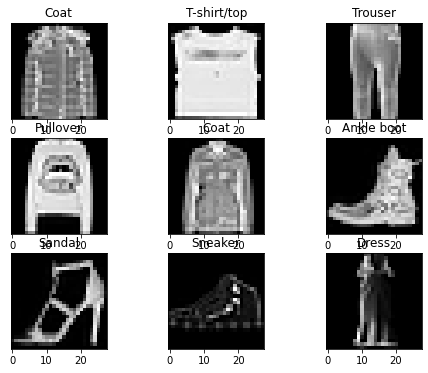

In [83]:
plt.figure(figsize = (8,6))
for i, idx in enumerate(samples): # enumerate 이너머레이트는 value의 값과 index의 값을 같이 가져온다.
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[idx], cmap='gray')
  plt.yticks([])
  # plt.xticks([])
  plt.title(class_name[y_train[idx]])
  
plt.show()

### 검증용 데이터 (Validation Data)

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(42000, 28, 28) (18000, 28, 28)
(42000,) (18000,)


### 정규화

In [85]:
x_train = x_train.astype('float32')/255.
x_val = x_val/255.
x_test = x_test/255.

In [86]:
np.min(x_train), np.max(x_train)

(0.0, 1.0)

In [87]:
y_train[:10]

array([9, 3, 5, 0, 3, 3, 9, 6, 6, 2], dtype=uint8)

In [88]:
# 원핫인코딩 (다중분류의 경우)

from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

In [89]:
y_train_oh[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [90]:
x_train = x_train.reshape(-1, 28*28) 
x_val = x_val.reshape(-1, 28*28) 
x_test = x_test.reshape(-1, 28*28) 

# 2차원의 이미지를 flatten시킴
# Dense Layer에 넣을때는 1차원으로 넣어야하므로
# 정형화 된 데이터를 .flatten()하여 넣는다

# 이렇게 데이터를 무작정 한줄로 펴주는것은 좋지않다.

# 이미지의 특징을 뽑아서(필터) 사용하는게 좋은데, 원래 이 필터만드는것을 사람이 했지만
# cnn은 필터만드는것을 컴퓨터한테 학습시킨다.
# cnn는 필터추출 레이어, 분류 레이어로 두가지로 나누어져있다.

In [92]:
x_train.shape

(42000, 784)

### 모델

In [96]:
model = keras.Sequential([
    layers.Dense(units = 256, activation ='relu', input_shape = (784,)),
    layers.Dense(units = 64, activation ='relu'),
    layers.Dense(units = 32, activation ='relu'),
    layers.Dense(units = 16, activation ='relu'),
    layers.Dense(units = 10, activation ='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics =['acc']
)

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 220,186
Trainable params: 220,186
Non-trainable params: 0
_________________________________________________________________


In [98]:
%%time
# 학습합니다.

EPOCHS = 30
BATCH_SIZE = 32

log = model.fit(x_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (x_val, y_val_oh),
                    verbose = 1)

Epoch 1/30
1313/1313 [==============================] - 8s 3ms/step - loss: 0.5856 - acc: 0.7964 - val_loss: 0.4098 - val_acc: 0.8521
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3929 - acc: 0.8595 - val_loss: 0.3863 - val_acc: 0.8564
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3546 - acc: 0.8711 - val_loss: 0.3564 - val_acc: 0.8687
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3294 - acc: 0.8800 - val_loss: 0.3490 - val_acc: 0.8751
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3114 - acc: 0.8857 - val_loss: 0.3441 - val_acc: 0.8733
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2932 - acc: 0.8920 - val_loss: 0.3367 - val_acc: 0.8820
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.2819 - acc: 0.8964 - val_loss: 0.3313 - val_acc: 0.8829
Epoch 8/30
1313/1313 [==============================] - 4s 3ms

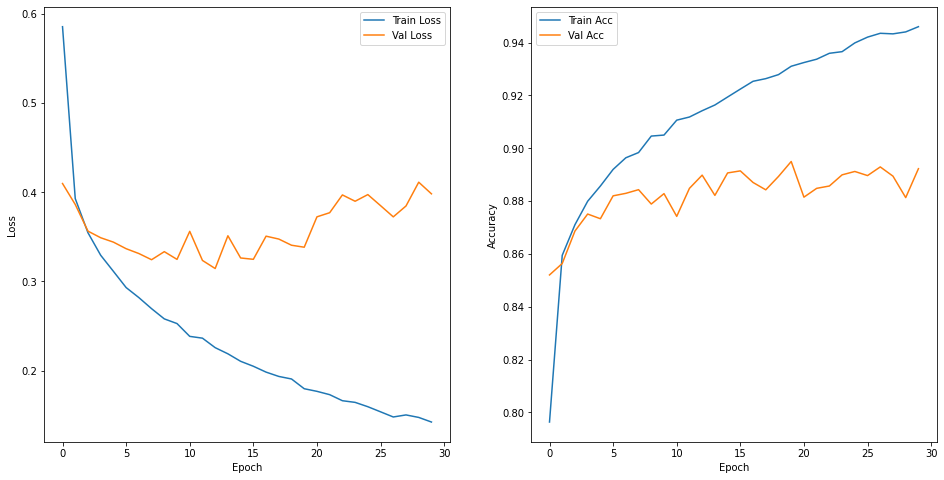

In [99]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(log) # 그래프가 벌어지면 과적합현상이 생기기 시작한것.

In [101]:
# 평가


model.evaluate(x_train, y_train_oh)

1313/1313 [==============================] - 3s 2ms/step - loss: 0.1279 - acc: 0.9516


[0.12790732085704803, 0.951619029045105]

In [103]:
model.evaluate(x_test, y_test_oh)

313/313 [==============================] - 1s 2ms/step - loss: 0.4483 - acc: 0.8872


[0.44826772809028625, 0.8871999979019165]

In [105]:
# 예측

y_pred = model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 0s 1ms/step


array([[1.51242227e-10, 2.80648486e-12, 4.05266386e-15, 3.88839183e-09,
        1.59969407e-08, 2.94058395e-07, 2.72097678e-10, 8.88545765e-06,
        2.52939319e-14, 9.99990821e-01],
       [5.10646962e-04, 6.62349897e-10, 9.99370754e-01, 2.06509370e-08,
        1.17545496e-04, 1.59782187e-11, 1.10037956e-06, 9.97307915e-21,
        7.63067647e-12, 6.33540493e-29],
       [2.26327395e-19, 1.00000000e+00, 1.82042631e-24, 1.46624422e-18,
        2.34233174e-22, 6.48725443e-36, 1.29551468e-21, 5.90857853e-30,
        2.42388833e-36, 0.00000000e+00],
       [4.06978519e-17, 1.00000000e+00, 2.87893265e-21, 2.15740393e-15,
        1.27981182e-20, 1.39623963e-29, 3.32402865e-19, 3.67073126e-25,
        4.98674937e-31, 0.00000000e+00],
       [3.50340479e-03, 3.42756639e-13, 6.49994263e-08, 8.89590679e-10,
        1.55857940e-08, 4.35574519e-24, 9.96496499e-01, 9.24449641e-17,
        6.71698142e-10, 2.84123303e-24]], dtype=float32)

In [106]:
y_pred = np.argmax(y_pred, axis = 1)

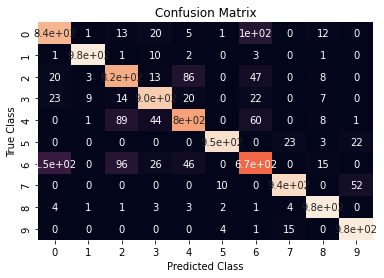

In [110]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [114]:
samples = np.where((y_test == y_pred ) == False)[0]
# samples
samples = np.random.choice(samples, 9)
samples

array([4708, 6868, 4798, 5919, 3554, 8532, 5470, 5052, 8658])

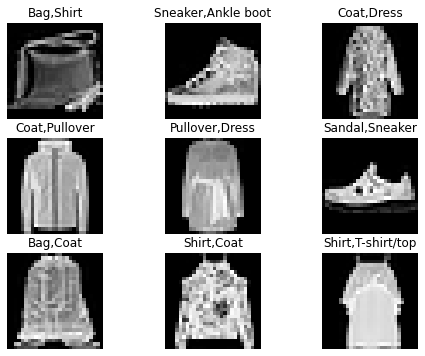

In [119]:
plt.figure(figsize = (8,6))
for i, idx in enumerate(samples): # enumerate 이너머레이트는 value의 값과 index의 값을 같이 가져온다.
  plt.subplot(3, 3, i+1)
  plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.title(f'{class_name[y_test[idx]]},{class_name[y_pred[idx]]}')
  
plt.show()